## 1. Introduction to deep learning 
#### Imagine you work for a bank
Imagine you work for a bank, and you need to build a `model predicting` how many transactions each customer will make next year. 

You have predictive data or features like each customer’s age, bank balance, whether they are retired and so on. 
#### Example as seen by linear regression
We'll get to `deep learning` in a moment, but for comparison, consider how a simple linear regression model works for this problem. 

The `linear regression` embeds an assumption that the outcome, in this case how many transactions a user makes, is the sum of individual parts. It starts by saying, `"what is the average?"`. Then it adds the effect of age. Then the effect of bank balance. And so on. So the linear regression model isn't identifying the interactions between these parts, and how they affect banking activity.

Say we plot predictions from this model.

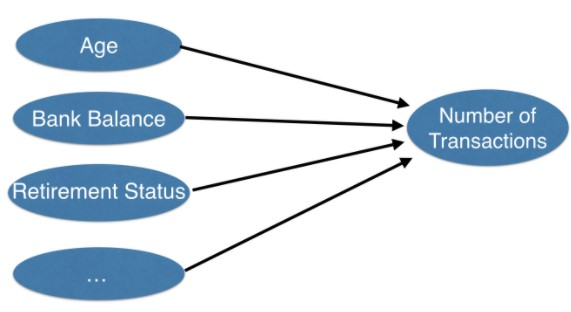

In [1]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

We draw one line with the predictions for retired people, and another with the predictions for those still working.

We put current bank balance on the horizontal axis, and the vertical axis is the predicted number of transactions.
- **The left graph** shows predictions from a model with no interactions. In that model we simply add up the effect of the retirement status, and current bank balance. The `lack of interactions` is reflected by both lines being parallel. That's probably unrealistic, but it's an assumption of the linear regression model. 
- The graph **on the right** shows the predictions from a model that `allows interactions`, and the lines don't need to be parallel. Neural networks are a powerful modeling approach that accounts for interactions like this especially well.

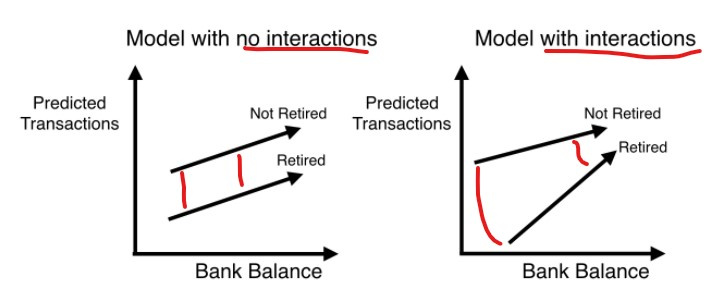

In [2]:
## Hình minh họa Image(fig1, height, width)



#### Interactions.
`Deep learning`, the focus of this course, is the use of **especially powerful neural networks**. 
- Because deep learning models account for these **types of interactions so well**, they **perform great on most prediction** problems you've seen before. 
- **But** their ability to capture extremely complex interactions also allow them to do amazing things with `text`, `images`, `videos`, `audio`, source code and almost anything else you could imagine doing data science with.

#### Course structure
The first two chapters of this course focus on conceptual knowledge about deep learning. 
- This part will be hard, but it will **prepare you to debug and tune** deep learning models on `conventional prediction problems`, and 
- It will **lay the foundation for progressing towards** those new and exciting applications. 

You'll see this pay off in the the last 2 chapters of [this course](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/Statistics/Deep%20Learning/Introduction%20to%20Deep%20Learning).

#### Build and tune deep learning models using keras
You will write code that looks like this, to build and tune deep learning models using keras, to solve many of the same modeling problems you might have previously solved with `scikit-learn`.

In [3]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
predictors = np.random.multivariate_normal(mean = [1 ,2 , 1], 
                                           cov = [[1, 0, 0], [0, 2, 0], [0, 0, 3]], 
                                           size = 1000)
n_cols = predictors.shape[1]
print('n_cols = ', n_cols)
print(22*'-*=')
model = Sequential()
model.add( Dense( 100, activation = 'relu', input_shape = (n_cols, ) ) )
model.add( Dense( 100, activation = 'relu' ) )
model.add( Dense(1) )

model.summary()

n_cols =  3
-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=-*=
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,601
Trainable params: 10,601
Non-trainable params: 0
_________________________________________________________________


As a start to how deep learning models capture interactions and achieve these amazing results, we'll modify the diagram you saw a moment ago.

#### Deep learning models capture interactions
Here there is an interaction between retirement status and bank balance. Instead of having them separately affect the `outcome`, we calculate a function of these variables that accounts for their interaction, and use that to predict the outcome.

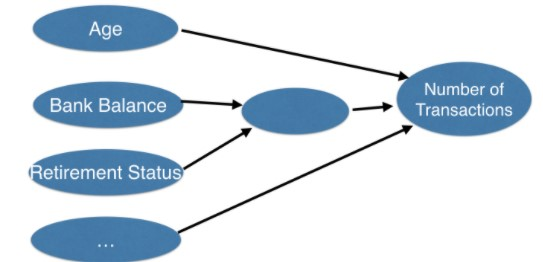

In [4]:
## Hình minh họa Image(fig1, height, width)

Even this graphic oversimplifies reality, where most things interact with each in some way, and real neural network models account for far more `interactions`. So the diagram for a simple neural network looks like this.

#### Interactions in neural network
- On the far left, we have something called an **input layer**. This represents our predictive features like `age` or `income`.

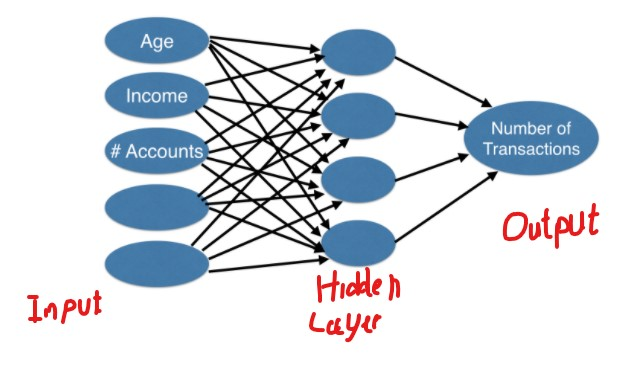

In [5]:
## Hình minh họa Image(fig1, height, width)

- On the far right we have the **output layer**. The prediction from our model, in this case, the predicted `number of transactions`. 
- All layers that are not the input or output layers are called **hidden layers** . They are called hidden layers because, *while the inputs and outputs correspond to visible things* that happened in the world, and they can be stored as data, the *values in the hidden layer aren't something we have data about, or anything we observe directly from the world*. 

Nevertheless, each dot, called a node, in the hidden layer, represents an aggregation of information from our input data, and each node adds to the model's ability to capture interactions. So the more nodes we have, the more interactions we can capture. 

### 1.2. PRACTICES
#### Exercise 1.2.1. Comparing neural network models to classical regression models
Which of the models in the diagrams has greater ability to account for interactions?

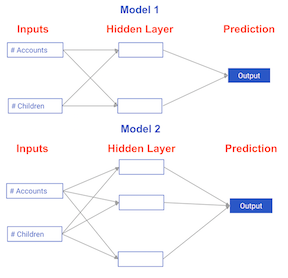

In [6]:
## Hình minh họa Image(fig1, height, width)

#### Answers.
- **Model 2** has more `nodes` in the `hidden` layer, and therefore, greater ability to capture interactions; so `model 2` is the correct option.
- In `model 1`, each `node` adds to the model's ability to capture interactions. So *the more nodes you have, the more interactions you can capture*.

#### Exercise 1.2.2. Rewrite the 2 Neural-Network in the previous Ex.
Suppose that your dataset have 5 (features) columns, you are asked to write a command that generate the NN as in the above image (in Exercise 1.2.1) 
- **For `model 1`.** We have `1 input_layer with 5 params` and `1 hidden layer with 3 nodes` and `1 output layer`.

In [7]:
model1 = Sequential()
model1.add( Dense( 2, activation = 'relu', input_shape = (5, ) ) )
model1.add( Dense(1) )

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [8]:
model2 = Sequential()
model2.add( Dense( 3, activation = 'relu', input_shape = (5, ) ) )
model2.add( Dense(1) )

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 4         
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


#### Exercise 1.2.2. Establish a simple NN.
You are asked to :
- Initialized a `Sequential` as `model2`
- Add `Dense` with 3 `input parameters`, `relu` activation function, with 64 neurons in the `FIRST hidden layer`.
- Add `Dense` with 32 neurons in the `next hidden layer` and `relu` activation function.
- Your output was 1 dimension.

In [9]:
model3 = Sequential()
model3.add( Dense( 64, activation = 'relu', input_shape = (3, ) ) )
model3.add( Dense( 32, activation = 'relu' ) )
model3.add( Dense(1) )

model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


## 2. Forward propagation
### 2.1. Theory.
We’ll start by showing how neural networks use data to make predictions. This is called the **forward propagation algorithm**.

#### Bank transactions example
Let's revisit our example predicting how many transactions a user will make at our bank. For simplicity, we'll make predictions based on only the `number of children` and `number of existing accounts`.

#### Forward propagation
This graph shows a customer with `2 children` and `3 accounts`. 

The `forward-propagation algorithm` will pass this information through the `network` to *make a `prediction` in the `output` layer*.

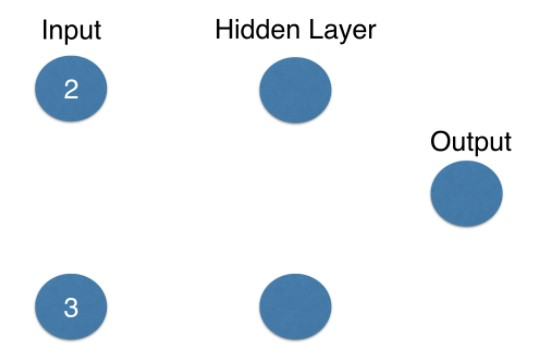

In [10]:
## Hình minh họa Image(fig1, height, width)

`Lines` connect the `inputs` to the `hidden layer`.

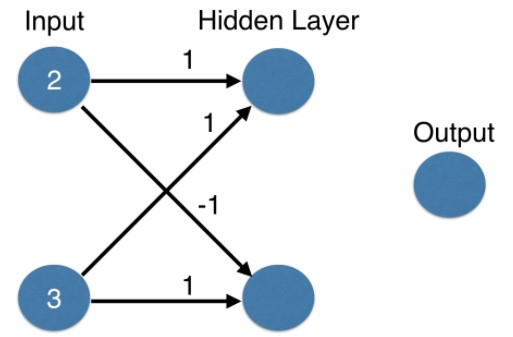

In [11]:
## Hình minh họa Image(fig1, height, width)

- Each `line` has a `weight` indicating **how strongly that input effects the hidden node that the line ends at**. 
- These are the first **set of weights**. We have `1 weight` from the `top input` into the `top node` of the `layer`, and 1 `weight` from the `bottom input` to the `top node` of the `hidden layer`.

These `weights` are the `parameters` we train or change when we `fit a neural network to data`, so these weights will be a focus throughout this course.

To make `predictions` for the `top node` of the `hidden layer`, we take the value of each `node` in the `input layer`, multiply it by the `weight` that ends at that `node`, and then sum up all the values. 

> In this case, we get $(2 \times 1) + (3 \times 1)$, which is $5$. 

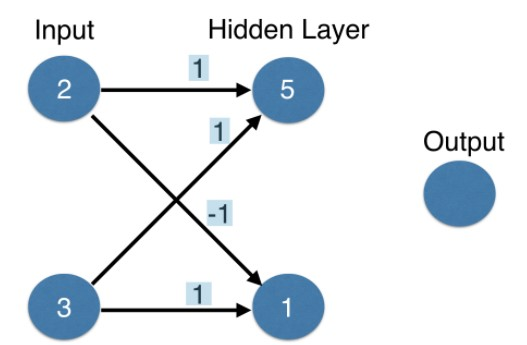

In [12]:
## Hình minh họa Image(fig1, height, width)

Now do the same to fill in the value of this node on the bottom. 

> That is $(2 \times (- 1)) + (3 \times 1)$. That's $1$.

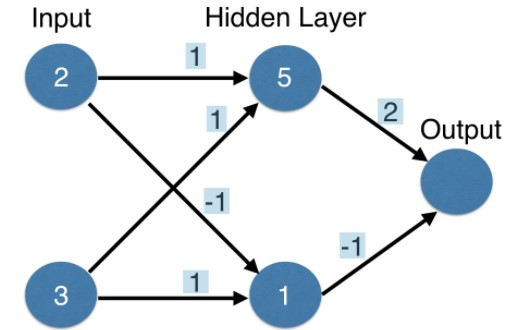

In [13]:
## Hình minh họa Image(fig1, height, width)

- Finally, repeat this process for the `next layer`, which is the `output layer`. 

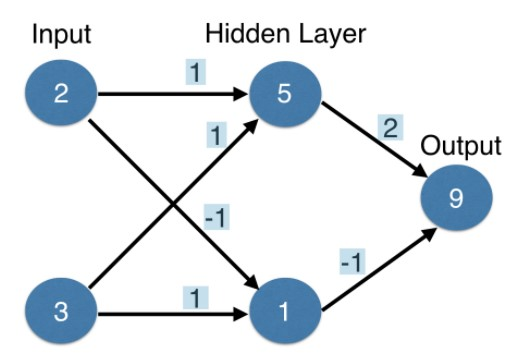

In [14]:
## Hình minh họa Image(fig1, height, width)

> That is $(5 \times 2) + (1 \times -1)$. That gives an output of $9$. 

We predicted 9 `transactions`. 

That’s **forward-propagation**. 
- We moved **from** the `inputs` on the *left*, **to** the `hidden layer` in the *middle*, and 
- **then from** the `hidden layers` **to** the `output` on the *right*. 

We always use that same `"multiply"` $[\times]$ then `"add"` $[+]$ `process`. 
- If you're familiar with `vector algebra` or `linear algebra`, that `operation` is a `dot product`. 
- If you don't know about `dot products`, that's fine too. That was **forward propagation** for a `single data point`. 

In general, we do `forward propagation` for **one data point at a time**. 

The `value` in that `last layer` is the **model's prediction** for *that data point*.

#### Forward propagation code
Let's see the code for this. We import `Numpy` for some of the mathematical operations. 

We've stored the input data as an `array`.

In [15]:
import numpy as np
input_data = np.array([2, 3])

We then have `weights` into each node in the `hidden layer` and to the `output`. 
- We store the `weights` going into each `node` as an `array`, and 
- We use a `dictionary` to **store** `those arrays`. 

In [16]:
weights = {'node 0': np.array([1, 1]) , 
           'node 1' : np.array([-1, 1]), 
           'output': np.array([2, -1]) 
          }

Let’s start `forward propagating`. 
- We fill in the `top hidden` node here, which is called `node 0`. We multiply the inputs by the weights for that `node`, and then `sum` both of those terms together. Notice that we had two weights for `node_0`. 
- That matches the 2 `items` in the `array` it is `multiplied` by, which is the `input_data`. These get converted to a single number by the sum function at the end of the line. 
- We then do the same thing for the `bottom node` of the `hidden layer`, which is called `node 1`.

Now, both `node 0` and `node 1` have `numeric values`.

In [17]:
node_0_values = (input_data * weights['node 0']).sum()
node_1_values = (input_data * weights['node 1']).sum()

To **simplify multiplication**, we put those in an `array` here. 
- If we print out the `array`, we confirm that those are the values from the `hidden layer` you saw a moment ago. It can also be instructive to verify this by hand with pen and paper. 

In [18]:
hidden_layer_values = np.array([node_0_values, node_1_values])
hidden_layer_values

array([5, 1])

- To get the output, we `multiply` the values in the hidden layer by the weights for the output. Summing those together gives us $10 - 1$, which is $9$.

In [19]:
output_values = (hidden_layer_values * weights['output']).sum()
print(output_values)

9


### 2.2. PRACTICES
#### Exercise 2.2.1. Coding the forward propagation algorithm
In this exercise, you'll write code to do `forward propagation (prediction)` for your first neural network:

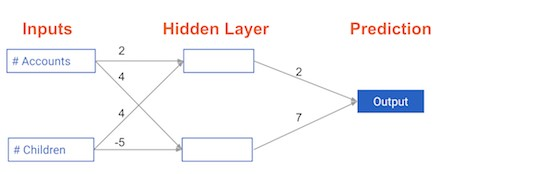

In [20]:
## Hình minh họa Image(fig1, height, width)

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

In [21]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

The input data has been pre-loaded as `input_data`, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in `weights['node_0']`, and the array of weights for the second node in the hidden layer are in `weights['node_1']`.

The weights feeding into the output node are available in `weights['output']`.

#### SOLUTION.

In [22]:
# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)

-39


**Comments.** It looks like the network generated a prediction of `-39`.

## 3. Activation functions
### 3.1. Theory.
Creating this `multiply-add-process` is only *half the story for `hidden layers`*. 

For `neural networks` **to achieve their maximum predictive power**, we must apply something called an **activation function** in the `hidden layers`.
####  Linear vs Nonlinear Functions
An activation function allows the model to capture `non-linearities`. 
`Non-linearities`, as shown on the right here, capture patterns like how going from no children to one child may impact your banking transactions differently than going from 3 `children` to 4.

We have examples of linear functions, straight lines on the left, and non-linear functions on the right. If the relationships in the data aren’t straight-line relationships, we will need an activation function that captures non-linearities.

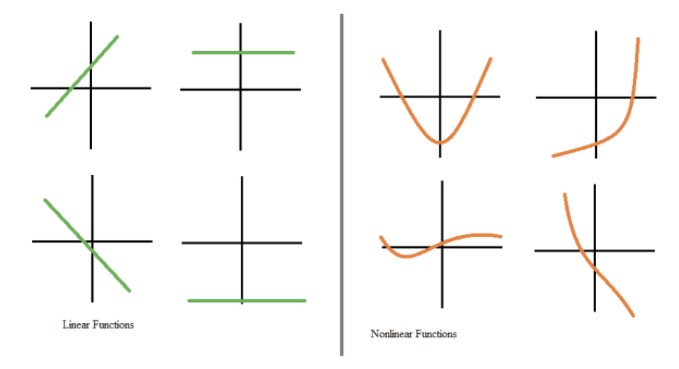

In [23]:
## Hình minh họa Image(fig1, height, width)

#### Activation functions
An `activation function` is something applied to the value coming into a `node`, which then *transforms it into the value stored in that `node`, or the `node output`*.

Let's go back to the previous diagram. 
- The `top hidden node` previously had a value of `5`. 
- For a long time, an `s-shaped` function called tanh was a popular activation function.
- If we used the `tanh activation function`, this `node's value` would be `tanh(5)`, which is very close to $1$.

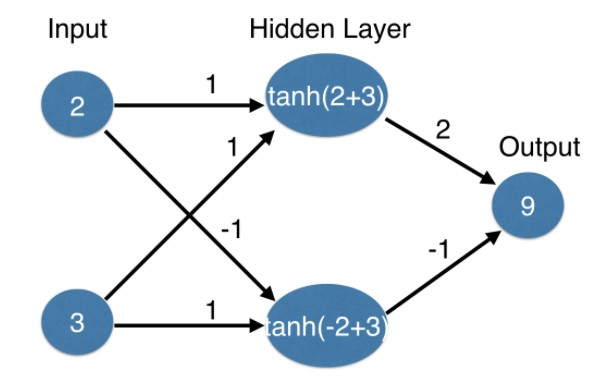

In [24]:
## Hình minh họa Image(fig1, height, width)

#### ReLU (Rectified Linear Activation)
Today, the standard in both `industry` and `research applications` is something called the `ReLU` or `rectified linear` *activation function*. That's depicted here. 

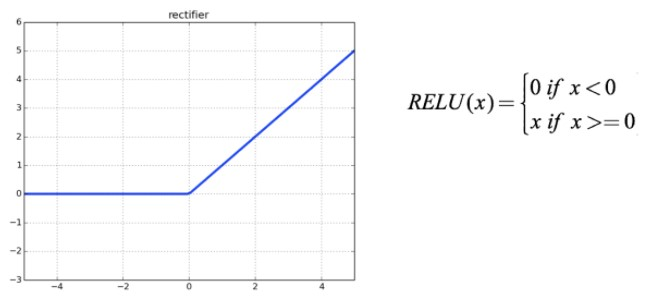

In [25]:
## Hình minh họa Image(fig1, height, width)

Though it has two `linear pieces`, it's surprisingly powerful when composed together through multiple successive `hidden layers`, which you will see soon. 

The code that incorporates activation functions is shown here. 

In [26]:
input_data = np.array([-1, 2])
weights = {'node_0': np.array([3, 3]), 
           'node_1': np.array([1, 5]), 
           'output': np.array([2, -1])}

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])

output = (hidden_layer_outputs * weights['output']).sum()
print(output)

0.9901095378334199


It is the same as the code you saw previously, but we've distinguished the `input` from the output in each `node`, which is shown in these lines and then again here.

And we've applied the `tanh function` to convert the `input` to the `output`. That gives us a `prediction` of $0.99$ transactions.

### 3.2. PRACTICES.
#### Exercise 3.2.1. The Rectified Linear Activation Function
As explained to you in the theory, an `"activation function"` is a function applied at each `node`. It converts the node's input into some output.

The `rectified linear activation functio`n (called `ReLU`) has been shown to lead to very high-performance networks. This function takes a single number as an `input`, returning `0` if the input is `negative`, and the `input` if the input is `positive`.

Here are some examples:

            relu(3) = 3
            relu(-3) = 0

#### SOLUTION.           

In [27]:
input_data = np.array([3, 5])
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]),
           'output': np.array([2, 7])}

def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


**Comments.**

You predicted `52 transactions`. Without this `activation function`, you would have predicted a negative number! 

The real power of `activation functions` will come soon when you start tuning model `weights`.

#### Exercise 3.2.2. Applying the network to many observations/rows of data
You'll now define a function called `predict_with_network()` which will generate predictions for multiple data observations, which are pre-loaded as `input_data`.

In [28]:
input_data = [np.array([3, 5]), np.array([ 1, -1]), np.array([0, 0]), np.array([8, 4])]
weights = {'node_0': np.array([2, 4]), 
           'node_1': np.array([ 4, -5]), 
           'output': np.array([2, 7])}

As before, `weights` are also pre-loaded. 

In addition, the `relu()` function you defined in the previous exercise has been pre-loaded.
#### SOLUTION.

In [29]:
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)

[52, 63, 0, 148]


## 4. Deeper networks
### 4.1. Theory.
The difference between modern deep learning and the historical `neural networks` that didn’t deliver these amazing results, is the use of models with **not just one hidden layer**, *but* with **many** successive `hidden layers`. 

We forward propagate through these successive layers in a similar way to what you saw for a `single hidden layer`.

#### Multiple hidden layers
Here is a network with **2 hidden layers**. 

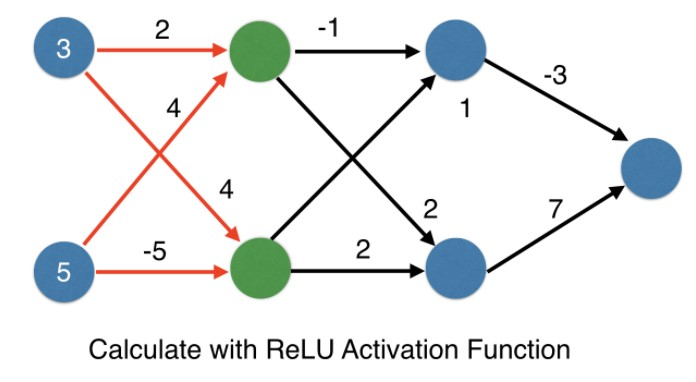

In [30]:
## Hình minh họa Image(fig1, height, width)
Image(r'../input/chap1p1/DL_chap1_fig4a.jpg', width = 450)

We first fill in the values for `hidden layer` one as a function of the `inputs`. Then apply the activation function to fill in the values in these nodes. Then use values from the first hidden layer to fill in the `second hidden layer`. Then we make a prediction based on the outputs of hidden layer two. In practice, it's becoming common to have neural networks that have many, many layers; `five layers`, `ten layers`. A few years ago 15 layers was state of the art but this can scale quite naturally to even a thousand layers. 

You use the same `forward propagation` process, but you apply that iterative process more times. Let's walk through the first steps of that. Assume all layers here use the `ReLU` activation function. We'll start by filling in the top node of the first hidden layer. That will use these two weights. The `top weights` contributes 3 times 2, or 6. The bottom weight contributes 20. The ReLU activation function on a positive number just returns that number. So we get 26.

Now let's do the `bottom node` of that first hidden layer. We use these two nodes. Using the same process, we get 4 times 3, or 12 from this weight. And -25 from the `bottom weight`. So the input to this node is 12 minus 25. Recall that, when we apply ReLU to a negative number, we get 0.

So this node is 0.We've shown the values for the subsequent layers here. Pause this video, and verify you can calculate the same values at each node. At this point, you understand the mechanics for how neural networks make predictions. Let’s close this chapter with an interesting and important fact about these deep networks. That is,

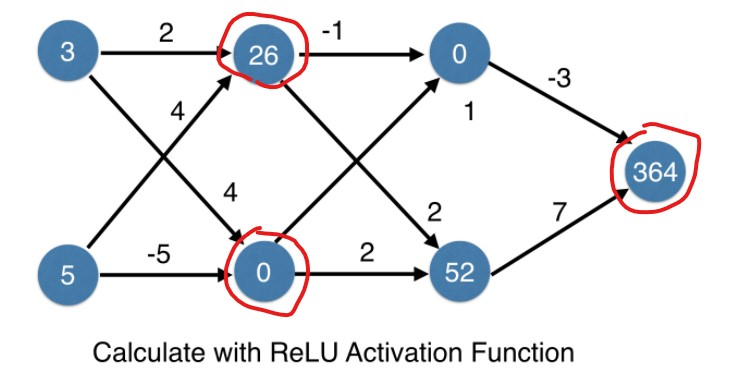

In [31]:
## Hình minh họa Image(fig1, height, width)

#### Representation learning
they internally build up representations of the patterns in the data that are useful for making predictions. And they find increasingly complex patterns as we go through successive hidden layers of the network. In this way, neural networks partially replace the need for feature engineering, or manually creating better predictive features.

Deep learning is also sometimes called representation learning, because subsequent layers build increasingly sophisticated representations of the raw data, until we get to a stage where we can make predictions. This is easiest to understand from an application to images, which you will see later in this course. 

Even if you haven't worked with images, you may find it useful to think through this example heuristically.

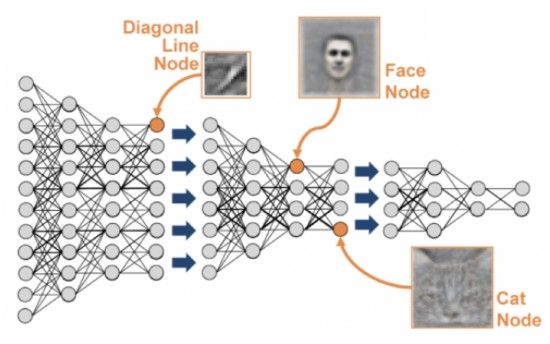

In [32]:
## Hình minh họa Image(fig1, height, width)

When a neural network tries to classify an image, the first hidden layers build up patterns or interactions that are conceptually simple. A simple interaction would look at groups of nearby pixels and find patterns like diagonal lines, horizontal lines, vertical lines, blurry areas, etc. 

Once the network has identified where there are diagonal lines and horizontal lines and vertical lines, subsequent layers combine that information to find larger patterns, like big squares. 

A later layer might put together the location of squares and other geometric shapes to identify a checkerboard pattern, a face, a car, or whatever is in the image. 
#### Deep learning
The cool thing about **deep learning** is that the modeler doesn’t need to specify those interactions. We never tell the model to look for diagonal lines.

Instead, when you train the model, which you’ll learn to do in the next chapter, the network gets weights that find the relevant patterns to make better predictions. 

Working with images may still seem abstract, but this idea of finding increasingly complex or abstract patterns is a recurring theme when people talk about deep learning, and it will feel more concrete as you work with these networks more.

### 4.2. PRACTICE
#### Exercise 4.2.1. Forward propagation in a deeper network
You now have a model with 2 hidden layers. The values for an input data point are shown inside the input nodes. The weights are shown on the edges/lines.

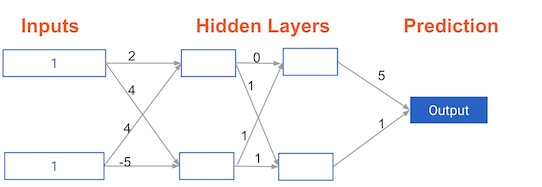

In [33]:
## Hình minh họa Image(fig1, height, width)

**Question. What prediction would this model make on this data point?**

Assume the `activation function` at each node is the `identity function`. That is, each `node's` output will be the same as its input. So the value of the bottom `node` in the `first hidden layer` is `-1`, and not `0`, as it would be if the `ReLU` activation function was used.

#### Answers.
- At the `first hidden layer`, we have
$$ (1 \times 2) + (1 \times 4) = 6, \qquad \text{for the top_node} $$
and
$$ (1 \times 4) + (1 \times (-5) ) = -1, \qquad \text{for the bottom_node}$$
- At the `second hidden layer`, we have
$$ (6 \times 0) + (-1 \times 1) = -1 $$
and
$$ (6 \times 1) + (-1 \times 1) = 5 $$
- Hence the value in the `output layer` is determined by:
$$ (-1 \times 5) + (5 \times 1) = 0 $$

#### Exercise 4.2.2. Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a `neural network` with 2 `hidden layers`. 
- Each `hidden layer` has two `nodes`. 
- The `input data` has been preloaded as `input_data`. 
- The `nodes` in the `first hidden layer` are called `node_0_0` and `node_0_1`. Their `weights` are pre-loaded as `weights['node_0_0']` and `weights['node_0_1']` respectively.

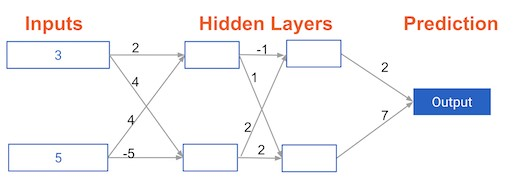

In [34]:
## Hình minh họa Image(fig1, height, width)

- The nodes in the `second hidden layer` are called `node_1_0` and `node_1_1`. Their weights are pre-loaded as `weights['node_1_0']` and `weights['node_1_1']` respectively.

We then create a model output from the hidden nodes using weights pre-loaded as `weights['output']`.  
#### SOLUTION

In [35]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])
    
    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])

    # Calculate model output: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


#### Exercise 4.2.3. Representations are learned
How are the weights that determine the features/interactions in Neural Networks created?
#### Answers.
The model training process sets them to optimize predictive accuracy.

And we will discuss in the next chapter.

#### Exercise 4.2.4. Levels of representation
Which layers of a model capture more complex or "higher level" interactions?
#### Answers.
The last layers capture the most complex interactions.